# RollerCoasters DataSet - шаг №1. Знакомство и базовые манипуляции.

**Познакомимся с Датасетом и затем проведем базовые манипуляции с его переменными, на основании чего выведем гипотезы**

Выбранный датасет включает данные об американских горках со всего мира. Его можно использовать для изучения популярности различных типов американских горок, самых распространенных парков развлечений и производителей американских горок.
Исходя из представленных данных о рейтинге горок, можно также оценить влияние года постройки, производителя, местоположения и года оценки на субъективное восприятие американских горок. 
Ссылка на датасет: https://www.kaggle.com/datasets/thedevastator/roller-coaster-data-from-around-the-world

**Рассмотрим переменные:**

-**Rank** - позиция американской горки в рейтинге (исходя из интерпретированных результатов потребительского исследования)

-**Name** - название американской горки

-**Park** - название парка, в котором находится горка

-**Location** - местоположение американской горки

-**Supplier** - производитель/поставщик американской горки

-**Year Built** - год постройки американской горки

-**Points** - абсолютное количество очков/баллов, полученных в результате субъективной оценки (исследование потребителей)

-**Year of rank** - год проведения оценки

In [1]:
import pandas as pd
import numpy as np

In [2]:
RollerCoasters = pd.read_csv("RollerCoasters.csv") # зададим в качестве переменной наименование датасета, чтобы в будущем было удобно к нему обращаться
print(RollerCoasters.shape) # определим с помощью команды ".shape" размерность датасета: 180 рядов и 8 колонок 
RollerCoasters

(180, 8)


,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013
...,...,...,...,...,...,...,...,...
175,46,Expedition Everest,Disney’s Animal Kingdom,"Orlando, Fla.",Vekoma,2006,82,2018
176,47,Storm Chaser,Kentucky Kingdom,"Louisville, Ky.",Rocky Mountain,2016,81,2018
177,48,Raging Bull,Six Flags Great America,"Gurnee, Ill.",B&M,1999,78,2018
178,49,Thunderbird,Holiday World,"Santa Claus, Ind.",B&M,2015,72,2018


In [3]:
RollerCoasters.info() # методом ".info" выведем полезную информацию о датасете и пропишем наблюдения в комментариях ниже
# наблюдение 1: подтверждаем выведенную ранее размерность датасета (180 рядов и 8 колонок)
# наблюдение 2: в датасете ОТСУТСТВУЮТ нулевые значения, т.е. он полностью заполнен данными без пропусков
# наблюдение 3: в датасете в равном количестве содержатся 2 типа переменных (строковые и целые числа)
# наблюдение 4: строковыми переменными являются колонки: наименование горки, парк аттракционов, месторасположение и поставщик
# наблюдение 5: в виде целых чисел представлены колонки: позиция в рейтинге, год постройки, набранные очки/баллы, год оценки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      180 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


In [4]:
# перед началом работы с датасетом, выборочно определим уникальные значения в некоторых колонках
RollerCoasters['Year of Rank'].unique() 

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

Метод .unique() помог выбрать из датасета все годы, в которые составлялись рейтинги американских горок. 
Таким образом, исследования проводились на протяжении 6 лет с 2013 по  2018 гг.

In [5]:
RollerCoasters['Supplier'].unique() 

array(['Intamin', 'B&M', 'Rocky Mountain', 'Arrow', 'Morgan', 'Mack',
       'RMC', 'Schwarzkopf', 'Schwarz', 'Lagoon', 'Chance', 'Vekoma',
       'Premier', 'Morgan/Arrow', 'Zierer'], dtype=object)

Таким образом, американске горки, попавшие в рейтинг, распределены между 15 производителями

In [6]:
# Интересно сравнить, в каком веке строили более "классные" горки: в 20м или в 21м. 
# Для этого используем методы фильтрации и сравним количество ТОП-10 горок, построенных до 2000х годов, и горок, построенных в 2000г и позднее.
RollerCoasters[(RollerCoasters['Year Built'] >= 2000) &
      (RollerCoasters['Rank'] <= 10)].shape

(53, 8)

Итого 53 американские горки, построенные в 2000-х и позднее, попали в ТОП-10

In [7]:
RollerCoasters[(RollerCoasters['Year Built'] < 2000) &
      (RollerCoasters['Rank'] <= 10)].shape

(7, 8)

Итого 7 американских горок, построенных в 20м веке, попали в ТОП-10

**Таким образом, фильтрация данных помогла выстроить первоначальную гипотезу о том, что год постройки влияет на позицию американской горки в рейтинге. Чем горка "новее", тем она интереснее.**

In [8]:
# Отсортируем наш датасет по 2 переменным: позиция в рейтинге и год постройки
RollerCoasters.sort_values(by=['Rank', 'Year Built'], ascending=[True, False])

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
30,1,Fury 325,Carowinds,"Charlotte, N.C.",B&M,2015,1126,2016
80,1,Fury 325,Carowinds,"Charlotte, N.C.",B&M,2015,1354,2017
130,1,Fury 325,Carowinds,"Charlotte, N.C.",B&M,2015,1222,2018
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
10,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1139,2014
...,...,...,...,...,...,...,...,...
79,49,GateKeeper,Cedar Point,"Sandusky, Ohio",B&M,2013,72,2016
78,49,Expedition Everest,Disney’s Animal Kingdom,"Orlando, Fla.",Vekoma,2006,72,2016
128,49,Expedition Everest,Disney’s Animal Kingdom,"Orlando, Fla.",Vekoma,2006,61,2017
129,50,Full Throttle,Six Flags Magic Mountain,"Valencia, Calif.",Premier,2013,59,2017


**Таким образом, благодаря инструменту множественной сортировки, нам удалось выявить, что ТОПовый аттракцион Fury 325 был произведен в 2015 году компанией B&M и на протяжении последних 3 лет исследований занимал лидирующую позицию по мнению любителей американских горок**

In [9]:
# в выбранном датасете попробуем создать новую бинарную переменную посредством фунции lambda (по признаку принадлежности переменной к заданному интервалу)
# хорошим претендентом на бинарную переменную является позиция аттракциона в рейтинге (Rank)
# Представим, что если горка является ТОПовой (т.е. имеет позицию в рейтнге не ниже 10), то она имеет признак 1 в колонке Top-Rank

In [10]:
RollerCoasters['TOP-Rank'] = RollerCoasters['Rank'].apply(lambda x: 1 if x in range(1,11) else 0)
RollerCoasters

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank,TOP-Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013,1
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013,1
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013,1
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013,1
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013,1
...,...,...,...,...,...,...,...,...,...
175,46,Expedition Everest,Disney’s Animal Kingdom,"Orlando, Fla.",Vekoma,2006,82,2018,0
176,47,Storm Chaser,Kentucky Kingdom,"Louisville, Ky.",Rocky Mountain,2016,81,2018,0
177,48,Raging Bull,Six Flags Great America,"Gurnee, Ill.",B&M,1999,78,2018,0
178,49,Thunderbird,Holiday World,"Santa Claus, Ind.",B&M,2015,72,2018,0


In [11]:
# Создадим также категориальную переменную "Rank Quality" на основе количественной "Rank"
# Новая категориальная переменная будет характеризовать позицию аттракциона в рейтинге по определенной шкале
# Позицию в интервале (1-5,включительно) будем считать Supreme
# Позицию в интервале (6-15, включительно) будем считать Leading
# Позицию в интервале (16-30, включительно) будем считать Fine
# Позицию в интервале (31-40, включительно) будем считать Satisfactory
# Позицию в интервале (41-50, включительно) будем считать Poor

In [12]:
def get_rank_qual(Rank):
    if Rank < 11:
        return 'Supreme'
    elif Rank < 16:
        return 'Leading'
    elif Rank < 31:
        return 'Fine'
    elif Rank < 41:
        return 'Satisfactory'
    elif Rank < 51:
        return 'Poor'
    else:
        return Rank

In [13]:
RollerCoasters['Rank Quality'] = RollerCoasters['Rank'].apply(get_rank_qual)

In [14]:
RollerCoasters

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank,TOP-Rank,Rank Quality
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013,1,Supreme
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013,1,Supreme
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013,1,Supreme
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013,1,Supreme
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013,1,Supreme
...,...,...,...,...,...,...,...,...,...,...
175,46,Expedition Everest,Disney’s Animal Kingdom,"Orlando, Fla.",Vekoma,2006,82,2018,0,Poor
176,47,Storm Chaser,Kentucky Kingdom,"Louisville, Ky.",Rocky Mountain,2016,81,2018,0,Poor
177,48,Raging Bull,Six Flags Great America,"Gurnee, Ill.",B&M,1999,78,2018,0,Poor
178,49,Thunderbird,Holiday World,"Santa Claus, Ind.",B&M,2015,72,2018,0,Poor


In [15]:
RollerCoasters['Supreme Quality'] = RollerCoasters['Rank Quality'] == 'Supreme'

In [16]:
RollerCoasters

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank,TOP-Rank,Rank Quality,Supreme Quality
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013,1,Supreme,True
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013,1,Supreme,True
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013,1,Supreme,True
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013,1,Supreme,True
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013,1,Supreme,True
...,...,...,...,...,...,...,...,...,...,...,...
175,46,Expedition Everest,Disney’s Animal Kingdom,"Orlando, Fla.",Vekoma,2006,82,2018,0,Poor,False
176,47,Storm Chaser,Kentucky Kingdom,"Louisville, Ky.",Rocky Mountain,2016,81,2018,0,Poor,False
177,48,Raging Bull,Six Flags Great America,"Gurnee, Ill.",B&M,1999,78,2018,0,Poor,False
178,49,Thunderbird,Holiday World,"Santa Claus, Ind.",B&M,2015,72,2018,0,Poor,False


In [17]:
RollerCoasters['Supreme Quality'] = RollerCoasters['Rank Quality'].apply(lambda x: 1 if x == 'Supreme' else 0)
RollerCoasters

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank,TOP-Rank,Rank Quality,Supreme Quality
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013,1,Supreme,1
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013,1,Supreme,1
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013,1,Supreme,1
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013,1,Supreme,1
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013,1,Supreme,1
...,...,...,...,...,...,...,...,...,...,...,...
175,46,Expedition Everest,Disney’s Animal Kingdom,"Orlando, Fla.",Vekoma,2006,82,2018,0,Poor,0
176,47,Storm Chaser,Kentucky Kingdom,"Louisville, Ky.",Rocky Mountain,2016,81,2018,0,Poor,0
177,48,Raging Bull,Six Flags Great America,"Gurnee, Ill.",B&M,1999,78,2018,0,Poor,0
178,49,Thunderbird,Holiday World,"Santa Claus, Ind.",B&M,2015,72,2018,0,Poor,0


In [18]:
RollerCoasters.info() 
# несмотря на то, что колонка Rank Quality является категориальной по смыслу, в info она отображается как строковая

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             180 non-null    int64 
 1   Name             180 non-null    object
 2   Park             180 non-null    object
 3   Location         180 non-null    object
 4   Supplier         180 non-null    object
 5   Year Built       180 non-null    int64 
 6   Points           180 non-null    int64 
 7   Year of Rank     180 non-null    int64 
 8   TOP-Rank         180 non-null    int64 
 9   Rank Quality     180 non-null    object
 10  Supreme Quality  180 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 15.6+ KB


In [19]:
# Следовательно, для завершения создания категориальной переменной, перекодируем ее в необходимый тип
RollerCoasters['Rank Quality'] = pd.Categorical(RollerCoasters['Rank Quality'])
RollerCoasters['Rank Quality']

0      Supreme
1      Supreme
2      Supreme
3      Supreme
4      Supreme
        ...   
175       Poor
176       Poor
177       Poor
178       Poor
179       Poor
Name: Rank Quality, Length: 180, dtype: category
Categories (5, object): ['Fine', 'Leading', 'Poor', 'Satisfactory', 'Supreme']

**Таким образом, благодаря созданию 2 новых переменных (бинарной и категориальной), нам удалось дополнить датасет качественной характеристикой престижности американских горок, что облегчит в дальнейшем работу с датасетом**

# RollerCoasters DataSet - шаг №2. Статистический анализ и визуализация.


In [20]:
# Построим частотную таблицу для категориальной переменной Rank Quality
RollerCoasters['Rank Quality'].value_counts()

Supreme         60
Fine            45
Poor            31
Satisfactory    29
Leading         15
Name: Rank Quality, dtype: int64

Таким образом, на основании частотного распределения, можно сделать вывод, что в представленном датасете преобладают американские горки, признанные любителями аттракционов ТОПовыми. При этом, аттракционов с плохим рейтингом всего лишь 31, это значит, что при просмотре данного датасета вероятность нарваться на плохой аттрацион, не заслуживающий особого внимания, составляет 17% из 100%.

In [21]:
# Посредством группировки попробуем определить, какой производитель чаще всего является поставщиком ТОПовых горок
RollerCoasters.groupby('Supplier')['Supreme Quality'].value_counts()

Supplier        Supreme Quality
Arrow           0                   6
                1                   1
B&M             0                  47
                1                  30
Chance          0                   2
Intamin         1                  21
                0                  16
Lagoon          0                   3
Mack            0                   9
Morgan          0                   3
                1                   1
Morgan/Arrow    0                   1
Premier         0                   1
RMC             0                  10
                1                   2
Rocky Mountain  0                   5
                1                   5
Schwarz         0                   2
Schwarzkopf     0                  11
Vekoma          0                   3
Zierer          0                   1
Name: Supreme Quality, dtype: int64

Таким образом, исходя из проведенной группировки, можно сделать вывод, что компания B&M является ведущим производителем ТОПовых американских горок. На 2-м месте в рейтинге производителей ТОПовых горок - компания Intamin

<AxesSubplot:xlabel='Supplier'>

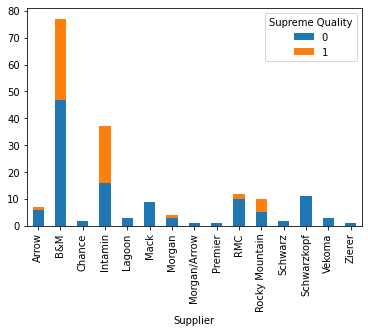

In [22]:
# Для бОльшей наглядности визуализируем данные, полученные выше, с помощью графика типа bar chart
RollerCoasters.groupby('Supplier')['Supreme Quality'].value_counts().unstack().plot(kind='bar', stacked=True)

### Меры центральной тенденции

In [23]:
# Для рассмотрения интересен год постройки аттракциона как один из возможных факторов влияния на позицию в рейтинге.
# Для этого определим среднее значение переменной Year Built
RollerCoasters['Year Built'].mean()

2004.6555555555556

Таким образом, делаем вывод, что, в среднем, аттракционы, попавшие в совокупный рейтинг были построены в 2004 году

In [24]:
# Определеим численное значение переменной Year Built, которое находится в середине ранжированного ряда
RollerCoasters['Year Built'].median()

2006.0

Таким образом, серединное значение года постройки аттракционов - 2006 год. Это год, близкий к среднему арифметическому 2004.

In [25]:
# Признак ряда, который лучше всего характеризует ценностную центральную тенденцию - это мода
# С помощью моды определим наиболее часто встречающееся значение варьирующего признака в вариационном ряду Year Built.
RollerCoasters['Year Built'].mode()

0    2001
1    2006
2    2015
Name: Year Built, dtype: int64

In [26]:
# Сгруппируем датасет по годам постройки и найдем, сколько очков набрали аттракционы в каждый год
RollerCoasters.groupby('Year Built')['Points'].mean()

Year Built
1976     74.333333
1978    164.000000
1987     93.000000
1988     99.000000
1989    262.800000
1993     95.000000
1994    269.000000
1996    196.333333
1997    107.857143
1999    330.300000
2000    921.615385
2001    500.812500
2002    209.500000
2003    270.666667
2006    197.500000
2007    219.833333
2008    189.666667
2009    376.200000
2010    356.200000
2011    301.111111
2012    299.500000
2013    305.000000
2014    164.500000
2015    398.812500
2016    174.666667
2018    395.333333
Name: Points, dtype: float64

<AxesSubplot:xlabel='Year Built'>

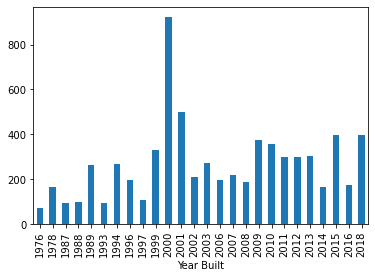

In [27]:
# Отобразим найденную тенденцию на графике
RollerCoasters.groupby('Year Built')['Points'].mean().plot(kind='bar')

**Изначально мы строили гипотезу о том, что год постройки влияет на рейтинг американской горки. По такой логике, самое высокое среднее значение должно быть в 2015 году. Но группировка по средним значениям не дает возможности однозначно подтвердить гипотезу, т.к. "самым плодотворным" годом с точки зрения постройки удачных и захватывающих аттракционов все-таки был рубежный 2000-й год.** 

In [28]:
# ОДНАКО если мы сравним 2000 и 2015 годы в среднем количестве набранных очков топовыми аттракционами, то лидирует 2015 год
RollerCoasters.groupby(['Year Built', 'Supreme Quality'])['Points'].mean()

Year Built  Supreme Quality
1976        0                    74.333333
1978        0                   164.000000
1987        0                    93.000000
1988        0                    99.000000
1989        0                   224.500000
            1                   416.000000
1993        0                    95.000000
1994        0                   220.750000
            1                   462.000000
1996        0                   196.333333
1997        0                   107.857143
1999        0                   152.200000
            1                   508.400000
2000        0                    99.000000
            1                   990.166667
2001        0                   293.750000
            1                   569.833333
2002        0                   209.500000
2003        0                   270.666667
2006        0                   160.285714
            1                   458.000000
2007        0                   138.500000
            1             

Таким образом, несмотря на то, что в среднем, аттракционы, построенные в 2000-м году набрали больше баллов при оценке, **ТОПовые аттракционы, построенные в 2015 году, в среднем, лидируют по баллам**, по сравнению с ТОПовыми горками 2000-го года постройки.

Поэтому можно сделать вывод, что уровень ТОПовых аттракционов, построенных в 2015 году, по средним баллам самый высокий.

In [29]:
# Для дополнительной оценки каждого года постройки аттракционов, найдем модальные значения в каждом ряду с помощью функции .agg
# Для этого снова сгруппируем датасет по годам и категориальной переменной Rank Quality
RollerCoasters.groupby('Year Built')['Rank Quality'].agg(lambda x: x.value_counts().index[0])

Year Built
1976            Poor
1978            Fine
1987    Satisfactory
1988    Satisfactory
1989         Leading
1993            Poor
1994            Fine
1996            Fine
1997            Poor
1999         Supreme
2000         Supreme
2001         Supreme
2002            Fine
2003            Fine
2006            Poor
2007            Poor
2008            Fine
2009         Supreme
2010         Supreme
2011         Supreme
2012         Supreme
2013            Poor
2014            Fine
2015            Fine
2016    Satisfactory
2018            Fine
Name: Rank Quality, dtype: object

Благодаря выявлению моды, мы получили оценку уровня концентрации каждого года по признаку оценочной характеристики аттракционов (Poor, Satisfactory, Fine, Leading, Supreme). Можно заявить, что в периоды **с 1999 по 2001** и **с 2009 по 2012** строились **примущественно ТОПовые аттракционы**. 

Неудачные годы - **1976, 1993, 1997, 2006-2007, 2013,** - **аттракционы, построенные в эти годы, в основном, оцениваются низко**.

### Меры разброса

In [30]:
# Сгруппируем данные снова по годам постройки и преобразуем их в отдельный датафрейм, зададим переменную
RollerCoasters_year = pd.DataFrame(RollerCoasters.groupby('Year Built')['Points'].sum())

<AxesSubplot:xlabel='Year Built'>

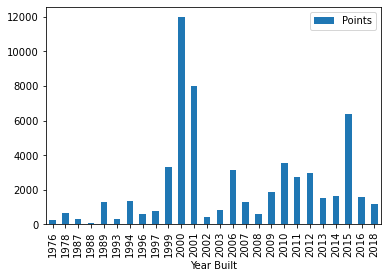

In [31]:
RollerCoasters_year.plot(kind='bar')

In [32]:
# Найдем размах вариации - поймем, какой у аттракционов разбег в баллах
RollerCoasters_year['Points'].max() - RollerCoasters_year['Points'].min()

11882

In [33]:
# найдем дисперсию и среднеквадратическое отклонение для выборки
# данные признаки будут характеризовать непосредственно степень рассеивания набранных баллов <Points> относительно среднего
# делаем анализ выборки, а не ген.совокупности, т.к. предполагаем, что по умолчанию наша выборка недооценивает настоящий разброс
RollerCoasters_mean = RollerCoasters_year['Points'].mean()
deviations = RollerCoasters_year['Points'] - RollerCoasters_mean
sq_deviations = deviations ** 2
variance_samp = sq_deviations.sum() / (len(RollerCoasters_year) - 1) # дисперсия
std_samp = np.sqrt(variance_samp) # среднеквадратическое отклонение
print(variance_samp)
print(std_samp)

7473534.08
2733.7765234195717


### Выбросы данных

In [34]:
RollerCoasters['Points'].describe()

count     180.000000
mean      325.433333
std       279.650322
min        59.000000
25%       112.250000
50%       246.000000
75%       427.000000
max      1354.000000
Name: Points, dtype: float64

In [35]:
# найдем нетипичные баллы (выбросы), которые получили атррактицоны в ходе оценки, квартильным методом
# для этого вычислим интерквартильный размах
q1 = RollerCoasters['Points'].quantile(0.25)
q3 = RollerCoasters['Points'].quantile(0.75)
iqr = q3 - q1
iqr

314.75

In [36]:
# будем считать, что выбросами будут являться значения, которые на 1.5 больше 3 квартиля. 
# Т.е. вычисляем только верхний порог, т.к. минимальное значение стремится к 0 (существенно меньше максимального)
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_up)

899.125


In [37]:
# Определим количестве наблюдений, которые будем считать выбросами, - их 12
RollerCoasters[RollerCoasters['Points'] > iqr_outlier_threshold_up].shape

(12, 11)

In [38]:
# Посмотрим, по каким годам сгруппированы эти нетипичные наблюдения
RollerCoasters[RollerCoasters['Points'] > iqr_outlier_threshold_up]['Year Built'].value_counts()

2000    9
2015    3
Name: Year Built, dtype: int64

По баллам атрракционов, выбросы имеют 2000 и 2015 годы, что неудивительно, ведь именно в эти годы были ранее зафиксированы самые высокие баллы ТОПовых американских горок. Объективно малое количество нетипичных значений гооврит о том, что, целом, однородная в области значений, выше среднего и не характеризуется обилием выбросов.

### Корреляция и визуализация данных

Напомним об изначальной гипотезе проводимого исследования датасета: год постройки аттракциона влияет на его позицию в рейтинге и эти величины имеют обратную зависимость (чем больше год постройки горки, тем меньше значение ее места в рейтинге). Для начала определим меру линейной взаимосвязи между этими факторами. Для этого вычислим коэффициент корреляции.

In [39]:
RollerCoasters['Year Built'].corr(RollerCoasters['Rank'])

-0.10767502193403031

Коэффициент корреляции действительно характеризует обратную взаимосвязь факторов. Однако его значение говорит о слабой взаимосвязи. Поэтому в дальнейшем нет смысла разбирать зависимость именно этих факторов.

<AxesSubplot:xlabel='Year Built', ylabel='Rank'>

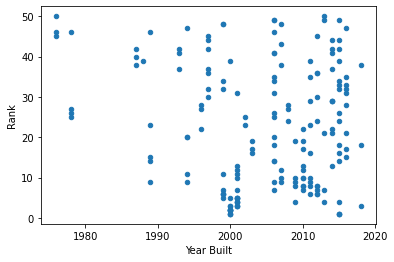

In [40]:
# в качестве подтверждения слабой взаимозависимости выбранных факторов построим график
RollerCoasters.plot('Year Built','Rank', kind='scatter')

Попробуем определить характер зависимости набранных в ходе оценки **очков** и **позиции аттракциона в рейтинге**. Очевидно, что у этих признаков разные статистические характеристики (размах вариации, интерквартильный размах, среднее, медиана, и т.д.), поэтому зависимость не может быть 100%.

In [41]:
RollerCoasters['Rank'].corr(RollerCoasters['Points'])

-0.8099665043339044

Действительно, **взаимосвязь** у этих факторов **обратная, высокая** (по шкале Чеддока). Значит, помимо набранных очков, существуют дополнительные факторы, повлиявшие на формирования рейтинга, но они не обозначены в датасете или количественно неизмеримы.

<AxesSubplot:xlabel='Rank', ylabel='Points'>

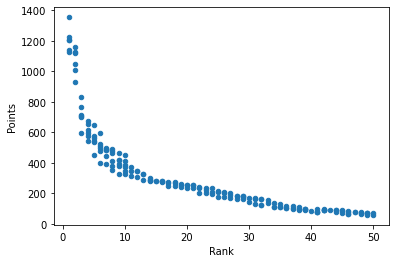

In [42]:
# Построим график линейной зависимости: 
RollerCoasters.plot('Rank','Points', kind='scatter')

In [43]:
import matplotlib.pyplot as plt # импортируем библиотеку, необходимую дляя построения графиков

Построим график: объединим нам датафрейм по производителям аттракционов и для каждого производителя найдем среднюю позицию в рейтинге американской горки.

In [44]:
RollerCoasters_suppliers = RollerCoasters.groupby('Supplier')['Rank'].mean()
RollerCoasters_suppliers

Supplier
Arrow             20.000000
B&M               21.311688
Chance            42.500000
Intamin           12.081081
Lagoon            39.333333
Mack              26.111111
Morgan            25.750000
Morgan/Arrow      13.000000
Premier           50.000000
RMC               22.000000
Rocky Mountain    19.900000
Schwarz           39.000000
Schwarzkopf       39.090909
Vekoma            48.000000
Zierer            36.000000
Name: Rank, dtype: float64

Визуализируем данные в столбчатой диаграмме:

<BarContainer object of 15 artists>

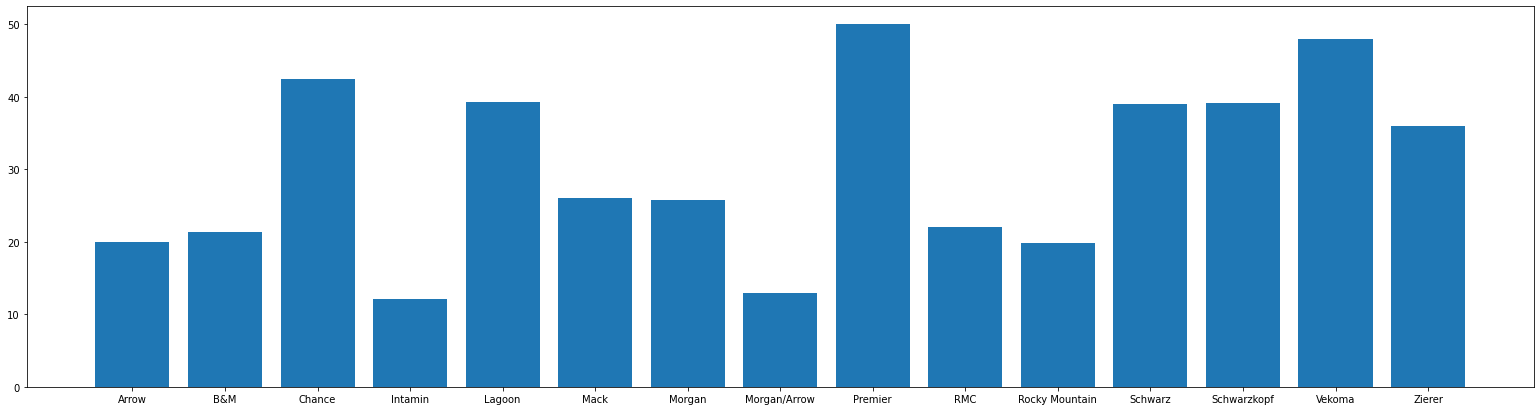

In [45]:
fig, ax = plt.subplots(figsize=(27,7))
# в скобках мы выбрали такую пропорцию графика, которая нам подходит
ax.bar(RollerCoasters_suppliers.index, RollerCoasters_suppliers)

Построим также линейный график:

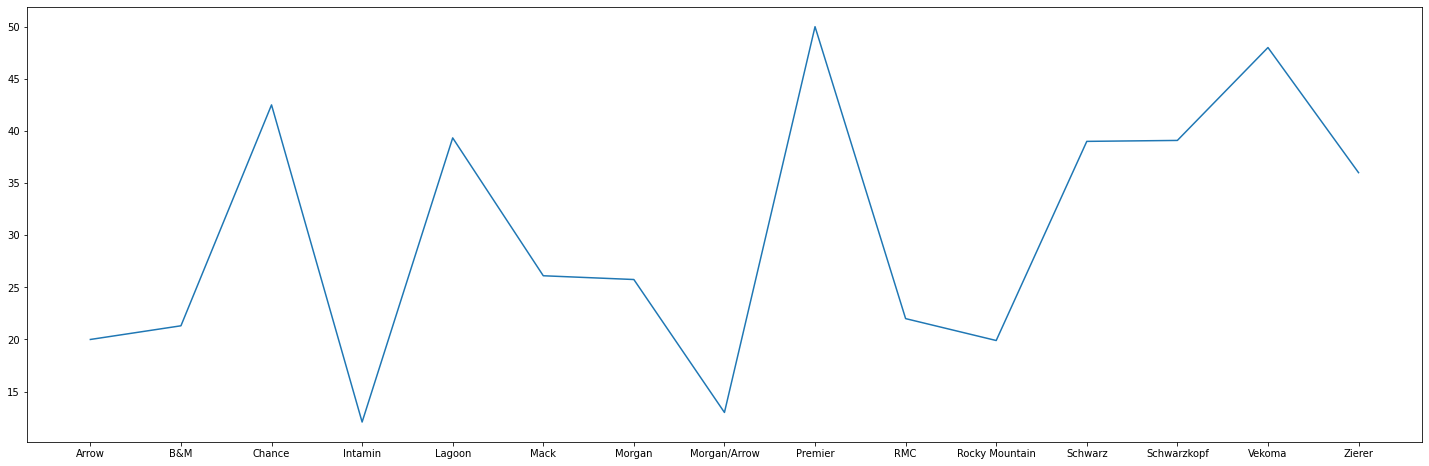

In [46]:
fig, ax = plt.subplots(figsize=(25,8))
ax.plot(RollerCoasters_suppliers.index, RollerCoasters_suppliers)

В итоге, по усредненным позициям в рейтинге компания **Intamin** выбивается в лидеры. Однако ранее мы выяснили, что среди производителей именно ТОПовых аттракционов лидирует B&M.  

Попробуем сгруппировать наши данные более сложным образом: посмотрим, в какие годы, какими производителями, какие в среднем были набраны позиции в рейтинге. Затем визуализируем данные на графике.

In [47]:
RollerCoasters.groupby(['Year Built', 'Supplier'])['Rank'].mean()

Year Built  Supplier      
1976        Schwarzkopf       47.000000
1978        Schwarzkopf       31.000000
1987        Schwarz           39.000000
            Schwarzkopf       42.000000
1988        Schwarzkopf       39.000000
1989        Arrow             15.250000
            Schwarzkopf       46.000000
1993        B&M               40.000000
1994        B&M               21.400000
1996        B&M               25.666667
1997        B&M               32.666667
            Mack              43.500000
            Morgan            40.500000
1999        B&M               20.300000
2000        Intamin            5.000000
2001        Arrow             31.000000
            B&M                6.166667
            Intamin            3.666667
            Morgan            11.000000
            Morgan/Arrow      13.000000
2002        Arrow             24.000000
2003        Intamin           17.333333
2006        B&M               25.727273
            Mack              16.000000
            V

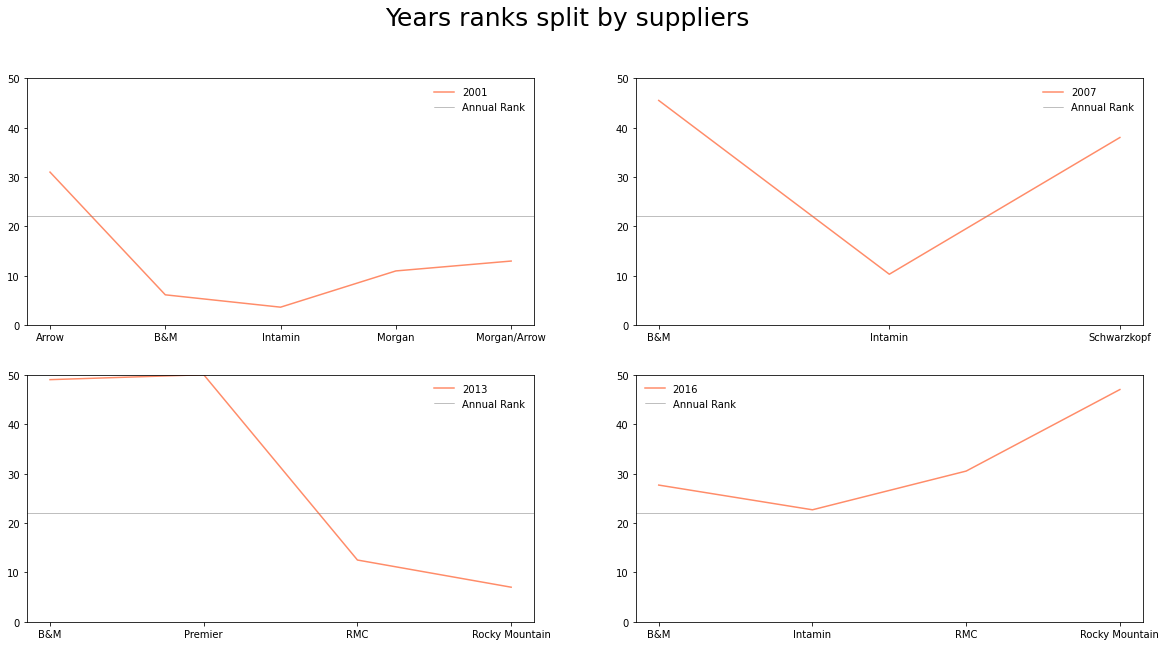

In [48]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0][0].plot(RollerCoasters.groupby(['Year Built', 'Supplier'])['Rank'].mean().loc[2001], c='#ff8c69')
ax[0][1].plot(RollerCoasters.groupby(['Year Built', 'Supplier'])['Rank'].mean().loc[2007], c='#ff8c69')
ax[1][0].plot(RollerCoasters.groupby(['Year Built', 'Supplier'])['Rank'].mean().loc[2013], c='#ff8c69')
ax[1][1].plot(RollerCoasters.groupby(['Year Built', 'Supplier'])['Rank'].mean().loc[2016], c='#ff8c69')

for axis in ax.ravel(): # стандартизируем ось ординат, чтобы нагляднее показать разницу в годах и производителях
    axis.set_ylim(0,50)
    axis.axhline(22.1, c='grey', lw=0.5) # добавим на каждый график линию - средняя позиция по всему рейтингу

# создадим легенду для каждого графика, чтобы можно было их отличать  
ax[0][0].legend(['2001', 'Annual Rank'], frameon=False)
ax[0][1].legend(['2007', 'Annual Rank'], frameon=False)
ax[1][0].legend(['2013', 'Annual Rank'], frameon=False)
ax[1][1].legend(['2016', 'Annual Rank'], frameon=False)

# добавим наименование графика
fig.suptitle('Years ranks split by suppliers', fontsize=25)

# сохраним график в нужном разрешении
fig.savefig('years.pdf')
fig.savefig('years.png', dpi=100)